In [108]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [109]:
from keras import regularizers

In [110]:
import os
import pandas as pd 

In [111]:
mylist= os.listdir('Data/')

In [112]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('positive')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('positive')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('positive')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('positive')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('negative')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('negative')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('negative')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('negative')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('negative')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('negative')

In [113]:
labels = pd.DataFrame(feeling_list)
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('Data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1      

In [114]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [115]:
newdf = pd.concat([df3,labels], axis=1)

In [116]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [117]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)

In [118]:
rnewdf=rnewdf.fillna(0)

In [119]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [120]:
trainfeatures = train.iloc[:, :-1]

In [121]:
trainlabel = train.iloc[:, -1:]

In [122]:
testfeatures = test.iloc[:, :-1]

In [123]:
testlabel = test.iloc[:, -1:]

In [124]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


In [125]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [126]:
X_train.shape

(1492, 216)

In [127]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)



In [132]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [133]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_25 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_26 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 27, 128)          

In [134]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [135]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
94/94 [==============================] - 2s 26ms/step - loss: 0.7378 - accuracy: 0.5456 - val_loss: 0.6822 - val_accuracy: 0.5670
Epoch 2/700
94/94 [==============================] - 2s 25ms/step - loss: 0.6824 - accuracy: 0.5777 - val_loss: 0.6572 - val_accuracy: 0.6237
Epoch 3/700
94/94 [==============================] - 2s 25ms/step - loss: 0.6735 - accuracy: 0.5777 - val_loss: 0.6640 - val_accuracy: 0.6108
Epoch 4/700
94/94 [==============================] - 2s 24ms/step - loss: 0.6711 - accuracy: 0.5845 - val_loss: 0.6519 - val_accuracy: 0.6108
Epoch 5/700
94/94 [==============================] - 2s 25ms/step - loss: 0.6636 - accuracy: 0.6066 - val_loss: 0.6479 - val_accuracy: 0.6340
Epoch 6/700
94/94 [==============================] - 2s 25ms/step - loss: 0.6549 - accuracy: 0.6092 - val_loss: 0.6481 - val_accuracy: 0.6108
Epoch 7/700
94/94 [==============================] - 2s 25ms/step - loss: 0.6568 - accuracy: 0.6193 - val_loss: 0.6745 - val_accuracy: 0.6108
Epoch 

94/94 [==============================] - 2s 26ms/step - loss: 0.5440 - accuracy: 0.7058 - val_loss: 0.6025 - val_accuracy: 0.6546
Epoch 116/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5439 - accuracy: 0.7279 - val_loss: 0.6289 - val_accuracy: 0.6263
Epoch 117/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5410 - accuracy: 0.7205 - val_loss: 0.6012 - val_accuracy: 0.6495
Epoch 118/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5408 - accuracy: 0.7185 - val_loss: 0.6082 - val_accuracy: 0.6469
Epoch 119/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5450 - accuracy: 0.7145 - val_loss: 0.6083 - val_accuracy: 0.6701
Epoch 120/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5433 - accuracy: 0.7279 - val_loss: 0.6200 - val_accuracy: 0.6495
Epoch 121/700
94/94 [==============================] - 3s 27ms/step - loss: 0.5411 - accuracy: 0.7205 - val_loss: 0.6085 - val_accuracy: 0.6521
Epoch 

Epoch 172/700
94/94 [==============================] - 2s 27ms/step - loss: 0.5109 - accuracy: 0.7353 - val_loss: 0.6292 - val_accuracy: 0.6263
Epoch 173/700
94/94 [==============================] - 3s 27ms/step - loss: 0.5105 - accuracy: 0.7433 - val_loss: 0.6096 - val_accuracy: 0.6727
Epoch 174/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5119 - accuracy: 0.7413 - val_loss: 0.6045 - val_accuracy: 0.6572
Epoch 175/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5028 - accuracy: 0.7547 - val_loss: 0.6053 - val_accuracy: 0.6598
Epoch 176/700
94/94 [==============================] - 2s 26ms/step - loss: 0.5053 - accuracy: 0.7480 - val_loss: 0.6031 - val_accuracy: 0.6649
Epoch 177/700
94/94 [==============================] - 2s 27ms/step - loss: 0.5062 - accuracy: 0.7379 - val_loss: 0.6224 - val_accuracy: 0.6521
Epoch 178/700
94/94 [==============================] - 3s 27ms/step - loss: 0.5062 - accuracy: 0.7520 - val_loss: 0.6055 - val_accuracy:

Epoch 229/700
94/94 [==============================] - 3s 28ms/step - loss: 0.4718 - accuracy: 0.7621 - val_loss: 0.6393 - val_accuracy: 0.6263
Epoch 230/700
94/94 [==============================] - 3s 27ms/step - loss: 0.4722 - accuracy: 0.7721 - val_loss: 0.6117 - val_accuracy: 0.6546
Epoch 231/700
94/94 [==============================] - 3s 27ms/step - loss: 0.4693 - accuracy: 0.7661 - val_loss: 0.6620 - val_accuracy: 0.6263
Epoch 232/700
94/94 [==============================] - 3s 28ms/step - loss: 0.4713 - accuracy: 0.7580 - val_loss: 0.6136 - val_accuracy: 0.6598
Epoch 233/700
94/94 [==============================] - 3s 27ms/step - loss: 0.4658 - accuracy: 0.7668 - val_loss: 0.6196 - val_accuracy: 0.6624
Epoch 234/700
94/94 [==============================] - 3s 27ms/step - loss: 0.4657 - accuracy: 0.7728 - val_loss: 0.6206 - val_accuracy: 0.6727
Epoch 235/700
94/94 [==============================] - 3s 27ms/step - loss: 0.4651 - accuracy: 0.7688 - val_loss: 0.6194 - val_accuracy:

Epoch 342/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3769 - accuracy: 0.8445 - val_loss: 0.6541 - val_accuracy: 0.6546
Epoch 343/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3714 - accuracy: 0.8418 - val_loss: 0.6597 - val_accuracy: 0.6443
Epoch 344/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3690 - accuracy: 0.8499 - val_loss: 0.6990 - val_accuracy: 0.6160
Epoch 345/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3720 - accuracy: 0.8445 - val_loss: 0.6472 - val_accuracy: 0.6521
Epoch 346/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3709 - accuracy: 0.8371 - val_loss: 0.6566 - val_accuracy: 0.6572
Epoch 347/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3684 - accuracy: 0.8438 - val_loss: 0.6715 - val_accuracy: 0.6418
Epoch 348/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3734 - accuracy: 0.8331 - val_loss: 0.6464 - val_accuracy:

Epoch 399/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3258 - accuracy: 0.8767 - val_loss: 0.6908 - val_accuracy: 0.6521
Epoch 400/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3255 - accuracy: 0.8720 - val_loss: 0.6799 - val_accuracy: 0.6521
Epoch 401/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3214 - accuracy: 0.8780 - val_loss: 0.6805 - val_accuracy: 0.6495
Epoch 402/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3249 - accuracy: 0.8660 - val_loss: 0.6837 - val_accuracy: 0.6495
Epoch 403/700
94/94 [==============================] - 2s 27ms/step - loss: 0.3183 - accuracy: 0.8780 - val_loss: 0.6986 - val_accuracy: 0.6443
Epoch 404/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3241 - accuracy: 0.8700 - val_loss: 0.7144 - val_accuracy: 0.6186
Epoch 405/700
94/94 [==============================] - 3s 27ms/step - loss: 0.3223 - accuracy: 0.8820 - val_loss: 0.6853 - val_accuracy:

Epoch 456/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2743 - accuracy: 0.8954 - val_loss: 0.7506 - val_accuracy: 0.6418
Epoch 457/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2741 - accuracy: 0.8988 - val_loss: 0.7541 - val_accuracy: 0.6160
Epoch 458/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2788 - accuracy: 0.8975 - val_loss: 0.7279 - val_accuracy: 0.6572
Epoch 459/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2770 - accuracy: 0.8975 - val_loss: 0.7270 - val_accuracy: 0.6340
Epoch 460/700
94/94 [==============================] - 3s 28ms/step - loss: 0.2779 - accuracy: 0.8928 - val_loss: 0.7728 - val_accuracy: 0.6082
Epoch 461/700
94/94 [==============================] - 3s 28ms/step - loss: 0.2738 - accuracy: 0.8948 - val_loss: 0.7447 - val_accuracy: 0.6237
Epoch 462/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2757 - accuracy: 0.9048 - val_loss: 0.7406 - val_accuracy:

Epoch 513/700
94/94 [==============================] - 2s 27ms/step - loss: 0.2397 - accuracy: 0.9155 - val_loss: 0.7754 - val_accuracy: 0.6521
Epoch 514/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2337 - accuracy: 0.9169 - val_loss: 0.7708 - val_accuracy: 0.6392
Epoch 515/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2264 - accuracy: 0.9249 - val_loss: 0.7589 - val_accuracy: 0.6314
Epoch 516/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2347 - accuracy: 0.9209 - val_loss: 0.8066 - val_accuracy: 0.6546
Epoch 517/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2270 - accuracy: 0.9216 - val_loss: 0.7868 - val_accuracy: 0.6598
Epoch 518/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2309 - accuracy: 0.9176 - val_loss: 0.7658 - val_accuracy: 0.6469
Epoch 519/700
94/94 [==============================] - 3s 27ms/step - loss: 0.2286 - accuracy: 0.9256 - val_loss: 0.7574 - val_accuracy:

Epoch 570/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1926 - accuracy: 0.9444 - val_loss: 0.8066 - val_accuracy: 0.6495
Epoch 571/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1927 - accuracy: 0.9370 - val_loss: 0.8038 - val_accuracy: 0.6418
Epoch 572/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1924 - accuracy: 0.9410 - val_loss: 0.8484 - val_accuracy: 0.6469
Epoch 573/700
94/94 [==============================] - 2s 27ms/step - loss: 0.1882 - accuracy: 0.9497 - val_loss: 0.8514 - val_accuracy: 0.6160
Epoch 574/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1865 - accuracy: 0.9517 - val_loss: 0.8231 - val_accuracy: 0.6314
Epoch 575/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1878 - accuracy: 0.9437 - val_loss: 0.8317 - val_accuracy: 0.6392
Epoch 576/700
94/94 [==============================] - 3s 29ms/step - loss: 0.1836 - accuracy: 0.9450 - val_loss: 0.8470 - val_accuracy:

Epoch 627/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1586 - accuracy: 0.9544 - val_loss: 0.9228 - val_accuracy: 0.6546
Epoch 628/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1570 - accuracy: 0.9544 - val_loss: 0.8911 - val_accuracy: 0.6469
Epoch 629/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1549 - accuracy: 0.9631 - val_loss: 0.8692 - val_accuracy: 0.6289
Epoch 630/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1509 - accuracy: 0.9605 - val_loss: 0.9525 - val_accuracy: 0.6546
Epoch 631/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1548 - accuracy: 0.9598 - val_loss: 0.8685 - val_accuracy: 0.6340
Epoch 632/700
94/94 [==============================] - 3s 27ms/step - loss: 0.1494 - accuracy: 0.9638 - val_loss: 0.8914 - val_accuracy: 0.6340
Epoch 633/700
94/94 [==============================] - 2s 27ms/step - loss: 0.1526 - accuracy: 0.9591 - val_loss: 0.9229 - val_accuracy:

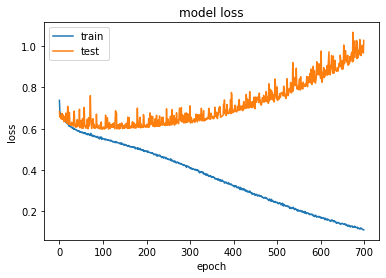

In [136]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

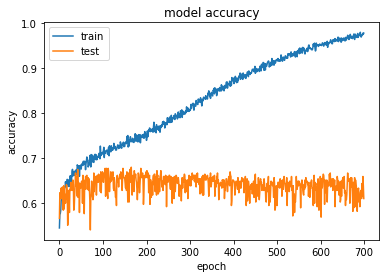

In [137]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()